In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [6]:
data = pd.read_csv("bank.csv")

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
data[data.isnull().any(axis=1)].count()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


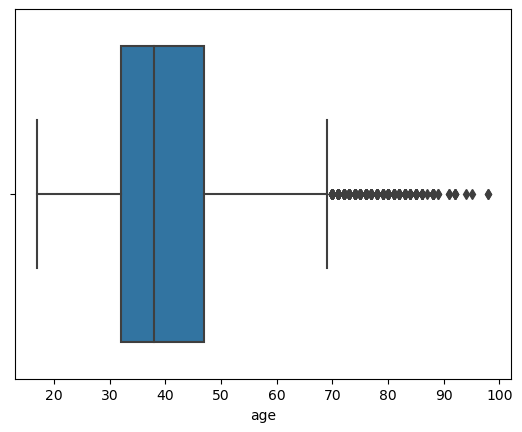

In [13]:
g = sns.boxplot(x=data["age"])

C:\Users\sivaa\AppData\Local\Temp\ipykernel_7556\1356112248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, bins=100)


<Axes: xlabel='age', ylabel='Density'>

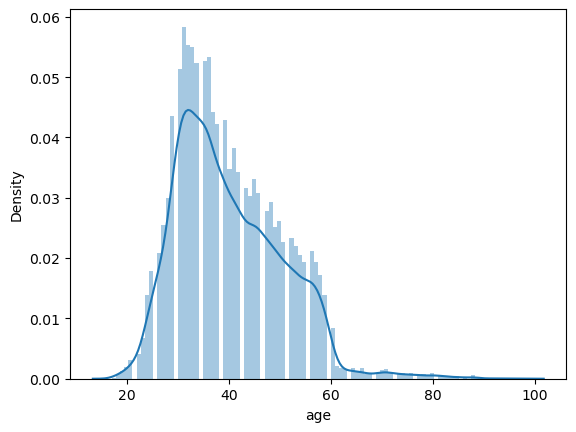

In [14]:
sns.distplot(data.age, bins=100)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

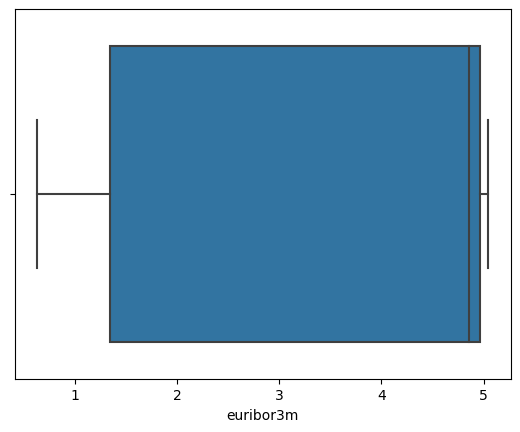

In [88]:
g = sns.boxplot(x=data["euribor3m"])


C:\Users\sivaa\AppData\Local\Temp\ipykernel_7556\3854565915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.pdays, bins=100)


<Axes: xlabel='pdays', ylabel='Density'>

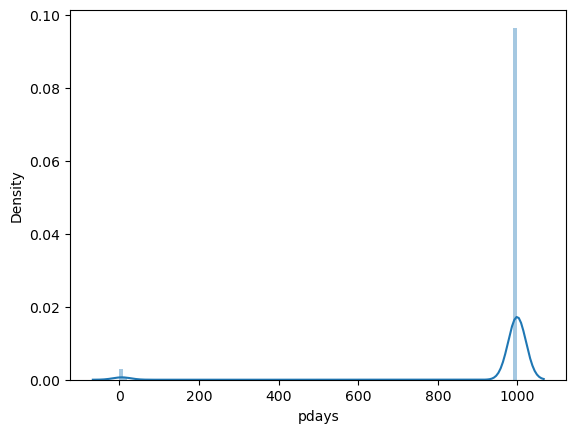

In [92]:
sns.distplot(data.pdays, bins=100)


In [22]:
data_bank = data.copy()


In [26]:
data_bank.job.value_counts()


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [28]:
data_bank['job'] = data_bank['job'].replace(['management', 'admin.'], 'white-collar')
data_bank['job'] = data_bank['job'].replace(['services','housemaid'], 'pink-collar')
data_bank['job'] = data_bank['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [29]:
data_bank.job.value_counts()


white-collar     13346
blue-collar       9254
technician        6743
pink-collar       5029
other             3939
entrepreneur      1456
self-employed     1421
Name: job, dtype: int64

In [30]:
data_bank.poutcome.value_counts()


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [31]:
data_bank['poutcome'] = data_bank['poutcome'].replace(['other'] , 'unknown')
data_bank.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [32]:
data_bank.drop('contact', axis=1, inplace=True)

In [33]:
data_bank["default"]
data_bank['default_cat'] = data_bank['default'].map( {'yes':1, 'no':0} )
data_bank.drop('default', axis=1,inplace = True)

In [34]:
data_bank["housing_cat"]=data_bank['housing'].map({'yes':1, 'no':0})
data_bank.drop('housing', axis=1,inplace = True)

In [35]:
data_bank["loan_cat"] = data_bank['loan'].map({'yes':1, 'no':0})
data_bank.drop('loan', axis=1, inplace=True)

In [47]:
print("Customers that have not been contacted before:", len(data_bank[data_bank.pdays==-1]))
print("Maximum values on padys    :", data_bank['pdays'].max())

Customers that have not been contacted before: 0
Maximum values on padys    : 999


In [48]:
data_bank.loc[data_bank['pdays'] == -1, 'pdays'] = 10000


In [49]:
data_bank['recent_pdays'] = np.where(data_bank['pdays'], 1/data_bank.pdays, 1/data_bank.pdays)

# Drop 'pdays'
data_bank.drop('pdays', axis=1, inplace = True)

In [50]:
data_bank.tail()


,age,job,marital,education,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_cat,housing_cat,loan_cat,recent_pdays
41183,73,other,married,professional.course,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,1.0,0.0,0.001001
41184,46,blue-collar,married,professional.course,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,0.0,0.0,0.001001
41185,56,other,married,university.degree,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,1.0,0.0,0.001001
41186,44,technician,married,professional.course,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,0.0,0.0,0.001001
41187,74,other,married,professional.course,fri,3,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,1.0,0.0,0.001001


In [51]:
bank_with_dummies = pd.get_dummies(data=data_bank, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,0,0,0,0,0,1,0
1,57,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,0,0,1,0
2,37,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,0,0,1,0
3,40,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,no,...,1,0,0,0,0,0,0,0,1,0
4,56,mon,1,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,1,0,0,0,0,0,1,0


In [52]:
bank_with_dummies.shape


(41188, 36)

In [53]:
bank_with_dummies.describe()


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_cat,housing_cat,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,32591.000000,40198.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.000092,0.536743,...,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.103234,0.863431,0.033335
std,10.42125,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.009594,0.498654,...,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.304268,0.343396,0.179512
min,17.00000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


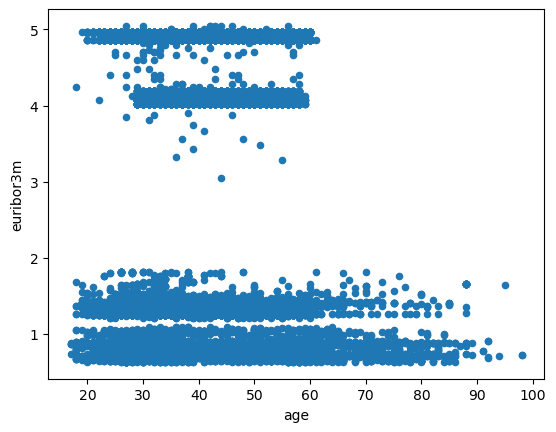

In [105]:
bank_with_dummies.plot(kind='scatter', x='age', y='euribor3m');

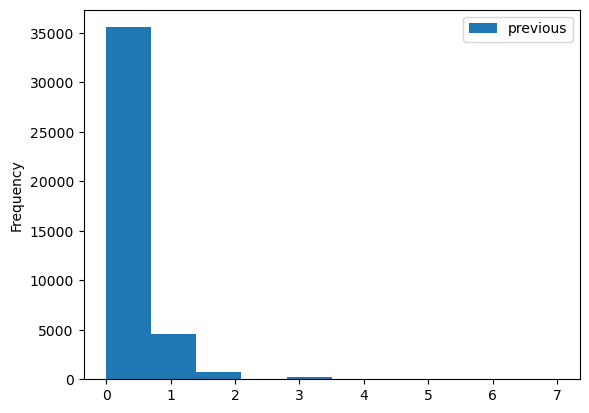

In [108]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='previous');


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [103]:
bank_with_dummies[data_bank.job == 1].describe()


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_cat,housing_cat,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
print(data_bank.columns)
print(data_bank.head())


Index(['age', 'job', 'marital', 'education', 'day_of_week', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'default_cat',
       'housing_cat', 'loan_cat', 'recent_pdays'],
      dtype='object')
   age           job  marital    education day_of_week  campaign  previous  \
0   56   pink-collar  married     basic.4y         mon         1         0   
1   57   pink-collar  married  high.school         mon         1         0   
2   37   pink-collar  married  high.school         mon         1         0   
3   40  white-collar  married     basic.6y         mon         1         0   
4   56   pink-collar  married  high.school         mon         1         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.

In [65]:
bankcl = bank_with_dummies


In [66]:
corr = bankcl.corr()
corr

C:\Users\sivaa\AppData\Local\Temp\ipykernel_7556\4010687159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bankcl.corr()


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_cat,housing_cat,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.004594,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.002924,-0.001636,...,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,-0.002537,-0.016376,0.035626
campaign,0.004594,1.000000,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.004207,-0.011168,...,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162,-0.068890,0.087645,-0.050893
previous,0.024365,-0.079141,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.002419,0.021656,...,-0.021493,-0.026418,0.014347,-0.002613,-0.007631,0.025419,0.022641,0.682608,-0.878776,0.524045
emp.var.rate,-0.000371,0.150754,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.005825,-0.060917,...,0.023065,0.020422,-0.017078,-0.002865,0.022154,-0.045331,-0.003038,-0.381706,0.472501,-0.256886
cons.price.idx,0.000857,0.127836,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.002657,-0.081396,...,0.031201,0.034202,0.008704,-0.009332,-0.003827,-0.091954,0.030016,-0.297718,0.304264,-0.077416
cons.conf.idx,0.129372,-0.013733,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.004990,-0.034167,...,-0.032796,-0.073855,-0.051876,0.002497,0.031234,0.073705,0.028275,-0.162592,0.099724,0.084824
euribor3m,0.010767,0.135133,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.006700,-0.059978,...,0.021225,0.018334,-0.020583,-0.001263,0.019634,-0.034208,-0.006061,-0.385417,0.488406,-0.281022
nr.employed,-0.017725,0.144095,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.007258,-0.046455,...,0.025810,0.030183,-0.015485,0.001372,0.016493,-0.034143,-0.021703,-0.349602,0.493051,-0.350613
default_cat,0.002924,-0.004207,0.002419,0.005825,-0.002657,0.004990,0.006700,0.007258,1.000000,-0.004042,...,-0.002064,-0.003800,0.002032,-0.000176,0.014841,-0.006716,-0.001862,0.006587,-0.004730,-0.001967
housing_cat,-0.001636,-0.011168,0.021656,-0.060917,-0.081396,-0.034167,-0.059978,-0.046455,-0.004042,1.000000,...,-0.007845,-0.001772,-0.006748,0.000799,0.013612,0.013290,-0.008110,0.021556,-0.025494,0.012229


In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame creation for demonstration purposes
# data_bank = pd.read_csv('your_file.csv')

# Check if the necessary columns exist
if 'poutcome' in data_bank.columns and 'duration' in data_bank.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='poutcome', y='duration', data=data_bank)
    plt.title('Bar Plot of Poutcome vs. Duration')
    plt.xlabel('Poutcome')
    plt.ylabel('Duration')
    plt.show()


C:\Users\sivaa\AppData\Local\Temp\ipykernel_7556\3503763369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_bank.corr()


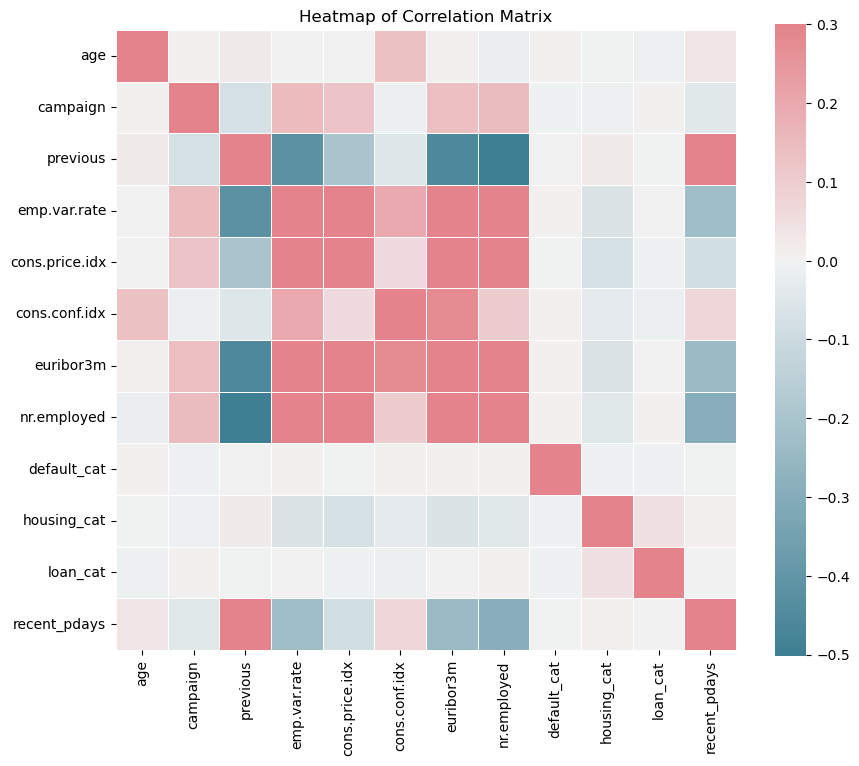

In [63]:

corr = data_bank.corr()
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')
plt.show()


<Axes: xlabel='job', ylabel='loan_cat'>

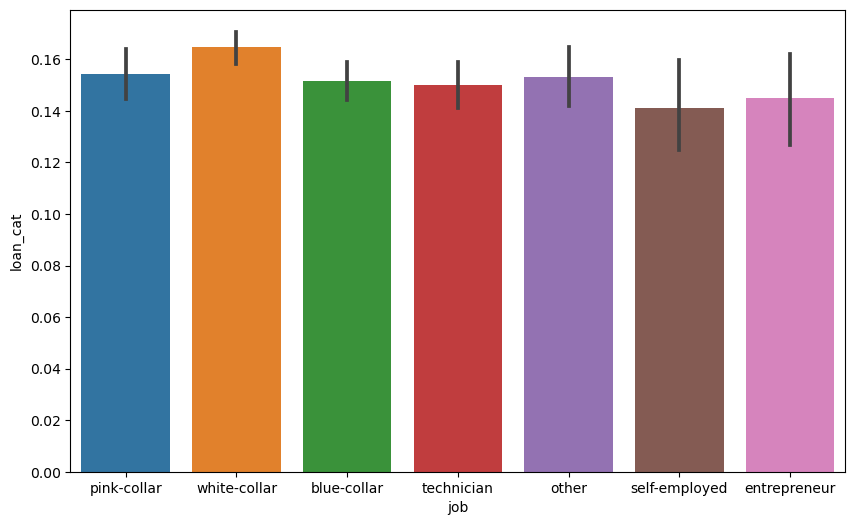

In [70]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'loan_cat', data = data_bank)

<Axes: xlabel='poutcome', ylabel='campaign'>

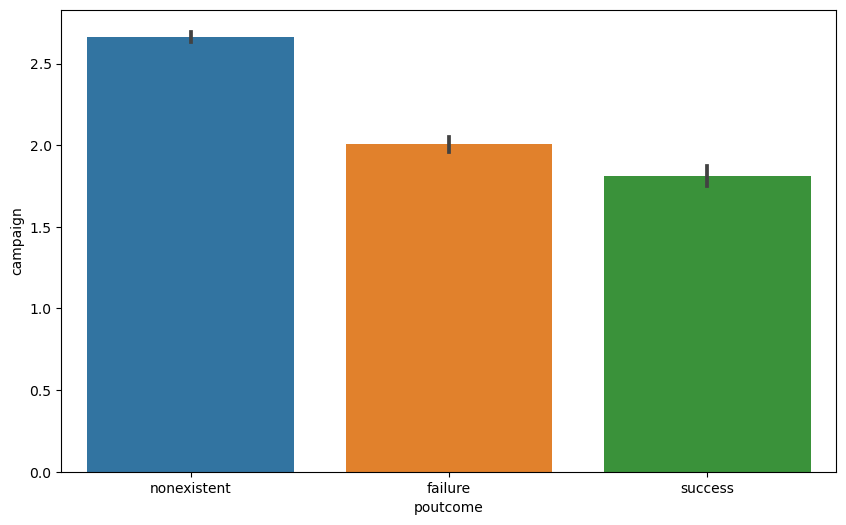

In [73]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'campaign', data = data_bank)